In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 폰트 적용 (한글 깨짐 방지)
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 14                 # 폰트 크기
plt.rcParams['figure.figsize'] = (13, 8)       # figsize 를 전역으로 설정
plt.rcParams['axes.unicode_minus'] = False     # -(마이너스) 표기 가능하도록 함

# 데이터 로딩, 변수 초기화

In [3]:
data = pd.read_csv('Global YouTube Statistics.csv', encoding='latin-1')

mon = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
       'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
data['created_month'] = data['created_month'].map(mon) # 두 번 실행하면 nan생김

columns = ['Country', 'Abbreviation', 'Gross tertiary education enrollment (%)',
           'Population', 'Unemployment rate', 'Urban_population',
           'Latitude', 'Longitude']
country = data[columns].drop_duplicates().dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

# 전처리

오류 데이터, 결측치 보완

In [4]:
# 채울 수 있는 것들 : 'Youtuber', 'subscribers', 'video views', 'uploads', 'Country',
#                    'created_year', 'created_month', 'created_date'
# 자동으로 채워지는 것들: 'Abbreviation', 'Gross tertiary education enrollment (%)', 'Population',
#                             'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'
corrections = {
    ('Country', 'China', ('Youtuber', 'Title'), ('李子柒 Liziqi', '李子柒 Liziqi')),
    ('rank', 7, ('Youtuber', 'Title'), ('✿ Kids Diana Show', '✿ Kids Diana Show')),
    ('rank', 940, ('Youtuber'), ('#Refúgio Mental')),
    ('rank', 75, ('Country'), ('Spain')),
    ('rank', 101, ('Country'), ('Ireland')),
    ('rank', 602, ('Country'), ('India')),
    ('rank', 816, ('Country'), ('Mexico')),
    ('rank', 973, ('Country'), ('India')),
    ('rank', 926, ('Country'), ('United States')),
    ('rank', 919, ('Country'), ('United States')),
    ('rank', 813, ('Country'), ('United States')),
    ('rank', 104, ('Country'), ('United States')),
    ('category', 'Travel & Events', ('Youtuber', 'Title', 'category'), ('Más SKabeche', 'Más SKabeche', 'Entertainment')),
    ('Youtuber', 'Fede Vigevani', ('Country'), ('Mexico')),
    ('Youtuber', 'Troom Troom PT', ('Country'), ('United States')),
    ('Youtuber', 'YouTube Movies', ('channel_type'), ('Film')),
    ('Youtuber', 'Ishtar Music', ('category'), ('Music')),
    ('Youtuber', 'Ultra Bollywood', ('category', 'channel_type'), ('Film & Animation', 'Film')),
    ('Youtuber', 'YouTube', ('created_year', 'created_month', 'created_date'), (2005, 10, 29)),
    ('Youtuber', '1MILLION Dance Studio', ('uploads', 'Country'), (5900, 'South Korea')),
    ('Youtuber', 'Sandeep Maheshwari', ('uploads', 'Country'), (594, 'India')),
    ('Youtuber', 'TKOR', ('uploads', 'Country'), (1500, 'United States')),
    ('Youtuber', 'MoniLina', ('uploads'), (795)),
    ('Youtuber', 'BRIGHT SIDE', ('uploads', 'created_year', 'created_month', 'created_date'),
     (6400, 2017, 3, 15)),
    ('Youtuber', 'Luisito Comunica', ('uploads', 'created_year', 'created_month', 'created_date'),
     (1200, 2012, 4, 15)),
    ('Youtuber', 'T-Series Apna Punjab', ('uploads', 'created_year', 'created_month', 'created_date'),
     (7700, 2011, 9, 26)),
    ('Youtuber', 'Luis Fonsi', ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (188, 'United States', 2014, 6, 25)),
    ('Youtuber', 'Alfredo Larin', ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1900, 'El Salvador', 2017, 4, 9)),
    ('Youtuber', 'Trap City', ('uploads', 'created_year', 'created_month', 'created_date'),
     (2700, 2012, 10, 13)),
    ('Youtuber', 'Musas', ('uploads', 'created_year', 'created_month', 'created_date', 'Population', 'Latitude','Longitude'),
     (630, 2012, 8, 28, 79535, 42.506389, 1.521389)),
    ('Youtuber', 'Chris Brown', ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (31, 'United States', 2006, 12, 21)),
    ('Youtuber', 'Good Mythical Morning', ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (3300, 'United States', 2008, 9, 17)),
    ('Youtuber', 'The Game Theorists', ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (648, 'United States', 2009, 8, 23)),
    ('Youtuber', 'LEGENDA FUNK', ('uploads', 'created_year', 'created_month', 'created_date'),
     (6100, 2013, 5, 11)),
    ('Youtuber', 'Harry Styles', ('uploads', 'created_year', 'created_month', 'created_date'),
     (17, 2017, 3, 9)),
    ('Youtuber', 'Busy Fun Ltd', ('category', 'uploads', 'Country', 'channel_type', 'created_year', 'created_month', 'created_date'),
     ('Comedy', 210, 'India', 'Comedy', 2019, 4, 6)),
    ('Youtuber', "LooLoo Kids - Nursery Rhymes and Children's Songs", ('Title', 'uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     ("LooLoo Kids - Nursery Rhymes and Children's Songs", 714, 'United States', 2014, 8, 6)),
    ('rank', 976, ('uploads', 'Youtuber', 'created_year', 'created_month', 'created_date'),
     (996, 'Gustavo Paródias', 2014, 4, 4)),
    ('rank', 932, ('subscribers', 'uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (17600000, 394, 'Argentina', 2014, 10, 21)),
    ('rank', 892, ('Youtuber', 'Title', 'uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     ('Knowledge Tv हिन्दी', 'Knowledge Tv हिन्दी', 2900, 'India', 2014, 3, 21)),
    ('rank', 809, ('uploads', 'created_year', 'created_month', 'created_date'),
     (110000, 2017, 12, 11)),
    ('rank', 968, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1900, 'United States', 2019, 8, 27)),
    ('rank', 987, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2900, 'United States', 2020, 2, 3)),
    ('rank', 15, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (6600, 'India', 2012, 1, 21)),
    ('rank', 52, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (130, 'United States', 2014, 6, 9)),
    ('rank', 49, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (18000, 'Mexico', 2014, 10, 14)),
    ('rank', 63, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (136, 'Chile', 2011, 9, 9)),
    ('rank', 76, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1000, 'United States', 2016, 3, 18)),
    ('rank', 78, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2300, 'Brazil', 2014, 7, 31)),
    ('rank', 864, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (865, 'South Korea', 2017, 5, 12)),
    ('rank', 936, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (5200, 'India', 2014, 3, 13)),
    ('rank', 831, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1300, 'India', 2015, 5, 11)),
    ('rank', 878, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (6200, 'Brazil', 2013, 11, 30)),
    ('rank', 779, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (8000, 'United States', 2014, 3, 22)),
    ('rank', 778, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (38, 'Germany', 2009, 5, 12)),
    ('rank', 105, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (141, 'United States', 2020, 4, 8)),
    ('rank', 110, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1200, 'India', 2018, 10, 10)),
    ('rank', 114, ('Country', 'created_month'), ('India', 9)),
    ('rank', 115, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (953, 'India', 2017, 8, 14)),
    ('rank', 123, ('Country', 'created_year', 'created_month', 'created_date'),
      ('India',2014, 10, 6)),
    ('rank', 136, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (4700, 'India', 2015, 6, 27)),
    ('rank', 141, ('Country', 'created_date'),
     ("South Korea",19)),
    ('rank', 167, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2800, 'Indonesia', 2014, 1, 22)),
    ('rank', 170, ('Country'), ('Ireland')),
    ('rank', 179, ('uploads', 'Country', 'created_month', 'created_date'),
     (483, "India", 7, 7)),
    ('rank', 181, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (21000, 'India', 2008, 5, 1)),
    ('rank', 184, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1100, 'Mexico', 2016, 2, 12)),
    ('rank', 189, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (58, 'Canada', 2009, 6, 6)),
    ('rank', 190, ('Country'), ('India')),
    ('rank', 201, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2400, 'United States',2014, 5, 13)),
    ('rank', 221, ('Youtuber', 'uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     ('Marília Mendonça', 140, 'Brazil', 2013, 5, 13)),
    ('rank', 229, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (316, 'United States', 2013, 8, 7)),
    ('rank', 234, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (225, 'Spain',2015, 10, 18)),
    ('rank', 236, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (180000, 'India',2017, 3, 3)),
    ('rank', 253, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (101, 'India', 2012, 10, 24)),
    ('rank', 265, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (4900, 'India', 2013, 11, 22)),
    ('rank', 270, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1900, 'India', 2010, 3, 16)),
    ('rank', 277, ('Country'),
     ('United States')),
    ('rank', 330, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (8400, 'Saudi Arabia', 2012, 1, 10)),
    ('rank', 331, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (3700, 'India', 2016, 5, 13)),
    ('rank', 339, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (3900,'United States', 2021, 3, 17)),
    ('rank', 349, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (362, 'India', 2019, 4, 25)),
    ('rank', 367, ('uploads', 'Country', 'created_month', 'created_date'),
     (469, 'United States', 10, 15)),
    ('rank', 387, ('Country', 'created_year', 'created_month', 'created_date'),
     ('United States', 2016, 1, 26)),
    ('rank', 395, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (4000, 'Brazil', 2014, 5, 18)),
    ('rank', 441, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1100, 'Brazil', 2016, 2, 16)),
    ('rank', 445, ('category', 'uploads', 'Country', 'channel_type', 'created_year', 'created_month', 'created_date'),
     ('Music', 62, 'United States', 'Music', 2016, 12, 1)),
    ('rank', 451, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (4100, 'United Kingdom', 2006, 9, 14)),
    ('rank', 464, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (950, 'United States', 2018, 5, 10)),
    ('rank', 477, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (962, 'India', 2012, 5, 1)),
    ('rank', 493, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (220, 'Indonesia', 2017, 8, 25)),
    ('rank', 174, ('created_year', 'created_month', 'created_date'),
     (2013, 12, 4)),
    ('rank', 203, ('Country'), ('India')),
    ('rank', 219, ('Country'), ('Sweden')),
    ('rank', 246, ('Country'), ('India')),
    ('rank', 259, ('Country'), ('United States')),
    ('rank', 289, ('Country'), ('India')),
    ('rank', 303, ('Country'), ('India')),
    ('rank', 305, ('Country'), ('Russia')),
    ('rank', 332, ('Country'), ('India')),
    ('rank', 361, ('created_year', 'created_month', 'created_date'),
     (2013, 12, 21)),
    ('rank', 383, ('Youtuber', 'Title', 'Country'),
     ("हिंदी - Genevieve's Playhouse", "हिंदी - Genevieve's Playhouse", 'United States')),
    ('rank', 411, ('Country'), ('United States')),
    ('rank', 426, ('Country'), ('United States')),
    ('rank', 427, ('Country'), ('Canada')),
    ('rank', 432, ('Country'), ('India')),
    ('rank', 433, ('Country'), ('United States')),
    ('rank', 458, ('Country'), ('United States')),
    ('rank', 470, ('Country'), ('India')),
    ('rank', 484, ('Country'), ('South Korea')),
    ('rank', 501, ('Country'), ('United States')),
    ('rank', 519, ('Country'), ('United States')),
    ('rank', 524, ('Country'), ('United States')),
    ('rank', 700, ('Country'), ('Israel')),
    ('rank', 766, ('Country'), ('France')),
    ('rank', 806, ('Country'), ('United States')),
    ('rank', 535, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (362, 'United Kingdom', 2012, 10, 7)),
    ('rank', 544, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (552, 'Mexico', 2012, 9, 4)),
    ('rank', 545, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (4700, 'Spain', 2012, 12, 12)),
    ('rank', 546, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (594, 'India', 2021, 5, 26)),
    ('rank', 549, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (781, 'Pakistan', 2013, 10, 30)),
    ('rank', 570, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (74000, 'Indonesia', 2015, 7, 28)),
    ('rank', 591, ('uploads', 'created_year', 'created_month', 'created_date'),
     (506, 2012, 6, 4)),
    ('rank', 596, ('Country'), ('South Korea')),
    ('rank', 17, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (6500, 'United States', 2016, 11, 15)),
    ('rank', 51, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (791, 'Belarus', 2014, 11, 29)),
    ('rank', 62, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (447, 'Norway', 2012, 8, 26)),
    ('rank', 123, ('uploads'), (130)),
    ('rank', 165, ('uploads', 'created_year', 'created_month', 'created_date'),
     (545, 2010, 7, 4)),
    ('rank', 227, ('uploads', 'created_year', 'created_month', 'created_date'),
     (1100, 2009, 6, 17)),
    
    ('rank', 274, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2100, 'United States', 2012,7,12)),
    ('rank', 300, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (169, 'United States', 2006,7,25)),
    ('rank', 341, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (273, 'Mexico', 2015,6,29)),
    ('rank', 362, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (55, 'United States', 2005,10,7)),
    ('rank', 378, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (746, 'United States', 2006,11,29)),
    ('rank', 399, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (8600, 'United States', 2005,6,16)),
    ('rank', 412, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (737, 'United States', 2013,9,9)),
    ('rank', 404, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (241, 'United States', 2011,9,11)),
    ('rank', 555, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (973, 'Mexico', 2007,2,28)),
    ('rank', 601, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (8300, 'Mexico', 2015,7,18)),
    ('rank', 605, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1900, 'Turkey', 2012,11,19)),
    ('rank', 625, ('Youtuber', 'Title', 'Country'),
     ('Kuplinov ► Play', 'Kuplinov ► Play', 'Russia')),   
    ('rank', 630, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (487,'United States', 2016,7,11)),
    ('rank', 635, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1300, 'United States', 2017,1,31)),
    ('rank', 669, ('Youtuber', 'Title', 'uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     ('Hongyu ASMR 홍유', 'Hongyu ASMR 홍유', 614, 'South Korea', 2018,9,9)),
    ('rank', 681, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2100, 'United States',2014,1,21)),
    ('rank', 711, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (445, 'United States', 2009,5,1)),
    ('rank', 756, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (613, 'Brazil', 2016,2,24)),
    ('rank', 770, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (952, 'United States', 2011,11,20)),
    ('rank', 801, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (130000, 'India', 2008,3,14)),
    ('rank', 854, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (767, 'India', 2016,11,26)),
    ('rank', 905, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (547,'India', 2020,3,11)),
    ('rank', 662, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (296, 'Mexico', 2016,11,16)),
    ('rank', 688, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (0, 'United States', 2019,8,14)),
    ('rank', 751, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (39,'United States', 2016,2,13)),
    ('rank', 287, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (8,'United States', 2016,3,16)),  
    ('rank', 28, ('uploads', 'created_year', 'created_month', 'created_date'),
     (26000, 2011, 2, 14)),
    ('rank', 175, ('Country', 'created_year', 'created_month', 'created_date'),
     ('Colombia', 2018, 3, 24)),  
    ('rank', 88, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (157, 'United Kingdom', 2010, 12, 3)),
    ('rank', 340, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2300, 'Spain', 2013, 5, 14)),
    ('rank', 370, ('uploads', 'created_year', 'created_month', 'created_date'),
     (1400, 2009, 12, 8)),
    ('rank', 415, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1300, 'India', 2016, 10, 26)),
    ('rank', 991, ('Youtuber', 'Title'),
     ('Natan por Aí', 'Natan por Aí')),
    ('rank', 973, ('category', 'channel_type'),
     ('Film & Animation', 'Film')),
    ('rank', 9, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (820, 'United States', 2016, 12, 6)),
}
for item in corrections:
    data.loc[data[item[0]]==item[1], item[2]] = item[3]

# 나라와 관련된 정보 null 값 채우기
for _, row in country.iterrows():
    for col in columns[1:]:
        data.loc[data['Country']==row['Country'], col] = row[col]

# 국가정보 업데이트 (벨라루스, 노르웨이, 이스라엘)
columns = ['Abbreviation', 'country_rank', 'Gross tertiary education enrollment (%)',
           'Population', 'Unemployment rate', 'Urban_population',
           'Latitude', 'Longitude']
data.loc[data['Country']=='Belarus', columns] = [
    'BY', None, None, 9349645, None, None, 53.90, 27.58]
data.loc[data['Country']=='Norway', columns] = [
    'NO', None, None, 5488984, None, None, 59.92, 10.75]
data.loc[data['Country']=='Israel', columns] = [
    'IL', None, None, 9383990, None, None, 31.77, 35.21]

# category, channel_type 값 변경 및 null 값 채우기
category_dict = {'Movies': 'Film & Animation'}
channel_type_dict = {'Games': 'Gaming',
                'Howto': 'Howto & Style',
                'Tech': 'Science & Technology',
                'Film': 'Film & Animation',
                'People': 'People & Blogs',
                'News': 'News & Politics',
                'Autos': 'Autos & Vehicles',
                'Animals': 'Pets & Animals',
                'Nonprofit': 'Nonprofits & Activism',
               }
for key in category_dict:
    data.loc[data['category']==key, 'category'] = category_dict[key]
for key in channel_type_dict:
    data.loc[data['channel_type']==key, 'channel_type'] = channel_type_dict[key]

temp = data['category'].isnull()
data.loc[temp, 'category'] = data.loc[temp, 'channel_type']
temp = data['channel_type'].isnull()
data.loc[temp, 'channel_type'] = data.loc[temp, 'category']

In [5]:
# 수정이 잘 되었는지 row별로 확인
# data[data['rank'] == 9].T

In [6]:
# data[data['uploads'] < 10].drop(index=[1, 5, 12, 18, 102, 173, 951, ])
# data[(data['uploads'] < 20) & (data['uploads'] >= 10)]

In [7]:
# data[data['Country'].isnull()].drop(index=[
#     5, 12, 57, 74, 102, 173, 331, 360, 518, 590, 592, 784, 805, 889, 939, 951])
# data[data['Country'].isnull()]

## 변수 정리

In [8]:
from datetime import datetime as dt
import time 

def toDecimalYear(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

def toDecimalYear2(year, month=1, day=1):
    return toDecimalYear(dt(year, month, day))

def to_date(x):
    decimal_year = toDecimalYear2(int(x[0]), int(x[1]), int(x[2]))
    return np.nan if x.isnull().sum() else decimal_year

#### 변수 변경

In [9]:
data['created'] = data[['created_year', 'created_month', 'created_date']].apply(to_date, axis=1)

del data['channel_type']
del data['created_year']
del data['created_month']
del data['created_date']

Decimal Year

In [10]:
a = toDecimalYear2(2023, 1, 1)
b = round(toDecimalYear2(2023, 9, 8), 5)
c = round(toDecimalYear2(2023, 12, 31), 5)
print('\t\tDecimal Year')
print('[2023-01-01]\t', a)
print('[오늘]\t\t', b)
print('[2023-12-31]\t', c)

		Decimal Year
[2023-01-01]	 2023.0
[오늘]		 2023.68493
[2023-12-31]	 2023.99726


#### 변수 한글화

In [11]:
data.columns = [
    '구독자 순위', '채널명', '구독자수', '조회수', '분류', '제목',
    '동영상 개수', '나라', '국가코드',
#     '채널 타입',
    '조회수 순위', '국가별 구독자 순위', '채널 타입별 순위',
    '최근 30일간 조회수', '최소 월 수익',
    '최대 월 수익', '최소 연 수익',
    '최대 연 수익', '최근 30일간 구독자수 증가',
#     '생성 연', '생성 월', '생성 일',
    '고등교육 등록비율(%)', '인구',
    '실업률', '도시인구', '위도', '경도',
    '생성날짜',
]

#### 변수 생성

In [12]:
data['*유지년수*'] = toDecimalYear2(2023, 8) - data['생성날짜']
data['*30일간 평균 업로드*'] = data['동영상 개수'] / data['*유지년수*'] / 12
data['[영상별 평균 조회수]'] = data['조회수'] / data['*유지년수*'] / 12

# EDA

## 2. 컨텐츠 전략

### 2-1. 가장 인기있는 카테고리는?

In [13]:
category = data['분류'].value_counts().reset_index()
category.columns = ['분류', '채널 수']

columns = ['구독자수', '조회수',
       '최근 30일간 구독자수 증가', '최근 30일간 조회수']
temp = data.groupby('분류')[columns].sum().reset_index()
category = category.merge(temp)

category['분류'] = (category.index + 1).astype(str) + '. ' + category['분류']
category['color'] = list(sns.color_palette("Set2", len(category)))

In [14]:
from matplotlib.gridspec import GridSpec
def make_subplots():
    axes = []
    fig = plt.figure(figsize=(16, 14))
    gs = GridSpec(3, 2, height_ratios=[3, 1, 1])
    axes.append(fig.add_subplot(gs[0, :]))
    axes.append(fig.add_subplot(gs[1, 0]))
    axes.append(fig.add_subplot(gs[1, 1]))
    axes.append(fig.add_subplot(gs[2, 0]))
    axes.append(fig.add_subplot(gs[2, 1]))
    return axes

In [15]:
def barplot(df, x, y, ax, N):
    df = df.sort_values(by=x, ascending=False)[:N].reset_index()
    sns.barplot(df[:N], x=x, y=y, ax=ax, palette=df['color'])
    for i, patch in enumerate(ax.patches):
        ax.text(x = ax.get_xlim()[1] * .01, y = patch.get_y() + 0.5,
                s = df.loc[i, y])
    ax.yaxis.set_visible(False)

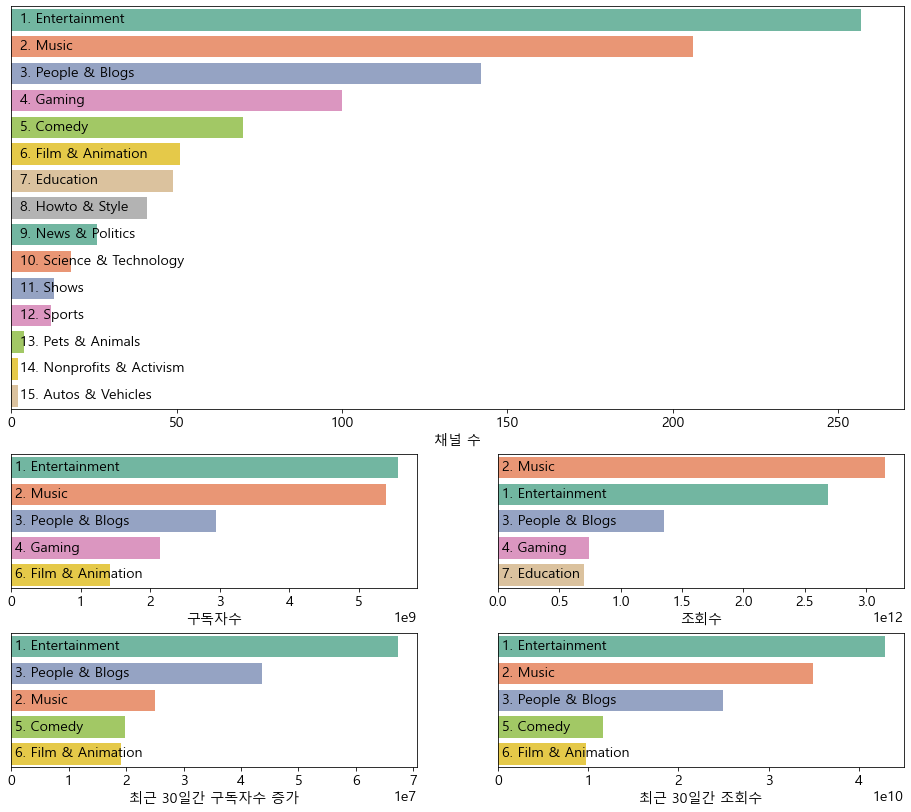

In [16]:
axes = make_subplots()
barplot(category, y='분류', x=category.columns[1], ax=axes[0], N=15)
for idx, col in enumerate(category.columns[2:-1]):
    barplot(category, y='분류', x=col, ax=axes[idx + 1], N=5)
plt.show()

#### 분석
- Entertainment, Music, People & Blogs 가 가장 인기있음
- 지표에 따른 순위는 크지 않은 약간의 변동만 있음
- Music, Education은 조회수에서 상대적으로 더 높음

[이유에 대한 가설]
       평균 재생시간이 짧아서 조회수가 더 높게 나오기 쉽다.
       (Education 채널은 주로 (10세 미만) kids용 채널)
      
- 최근에 Gaming의 인기가 떨어지고 있다

#### 결론
1. YouTube는 재미가 있어야한다. (Entertainment, People & Blogs, Gaming, Film & Animation)

2. YouTube를 통해 음악을 많이 듣는다.

3. YouTube를 통해 사람들의 일상, life, 놀이 등을 보는걸 즐긴다 (People & Blogs)

4. 영화분류의 채널을 직접 들어가서 확인을 해보면,
- 인도에선 무료영화를 Youtube로 많이 보고,
- 나머지 나라에선 (홍보용) Clip영상, (줄거리를 자세히 요약한) 영화소개, kids용 Animation등이 인기를 끈다.


 ### 2-2. 시청자들에게 반향을 일으키는 '업로드 빈도수' 찾기


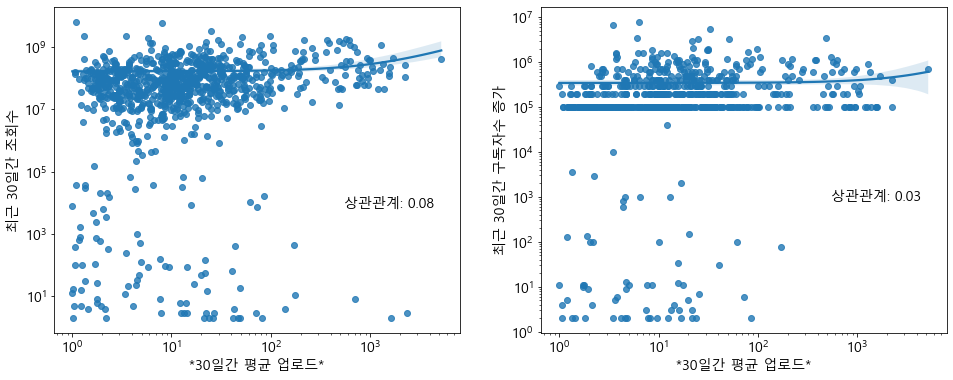

In [17]:
frequency = data[['구독자수', '조회수', '동영상 개수', '*30일간 평균 업로드*',
                  '최근 30일간 조회수', '최근 30일간 구독자수 증가', '[영상별 평균 조회수]']] + 1
x = '*30일간 평균 업로드*'
# y = '*영상별 평균 조회수*'
y = '최근 30일간 조회수'

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(frequency, x=x, y=y, ax=ax1)
ax1.text(x = (ax1.get_xlim()[1]) * .1, y = ax1.get_ylim()[1]*.000001,
        s = f'상관관계: {data[[x, y]].corr().iloc[0,1].round(2)}')
ax1.loglog()

y = '최근 30일간 구독자수 증가'
sns.regplot(frequency, x=x, y=y, ax=ax2)
ax2.text(x = (ax2.get_xlim()[1]) * .1, y = ax2.get_ylim()[1]*.0001,
        s = f'상관관계: {data[[x, y]].corr().iloc[0,1].round(2)}')
ax2.loglog()
plt.show()

#### 분석
- "빈도수" = "30일간 평균 업로드 수"는 대체로 1 ~ 수백 개 정도 이다

결론
- "빈도수"와 "인기" 사이에는 상관 관계가 미미한 수준이다.

   (인기도: '최근 30일간 시청 수', '최근 30일간 구독자 수 증가')

## 1.YouTube 분석

상위권 유튜브 채널의 성공 요인에 대한 가치 있는 통찰력을 얻고 다른 채널과 차별화되는 점을 이해하십시오.

### 수치형 데이터 상관관계

In [18]:
def triangle_heatmap(corr, square=True, annot=True, cmap='RdYlBu'):
    # 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, square=square, annot=annot, linewidths=0.5,
                mask=mask,                 # 표시하지 않을 마스크
                cmap=cmap,                 # Red, Yellow, Blue 색상으로 표시
                vmin = -1,vmax = 1,        # 컬러바 범위
                cbar_kws={"shrink": .5},   # 컬러바 크기
               )

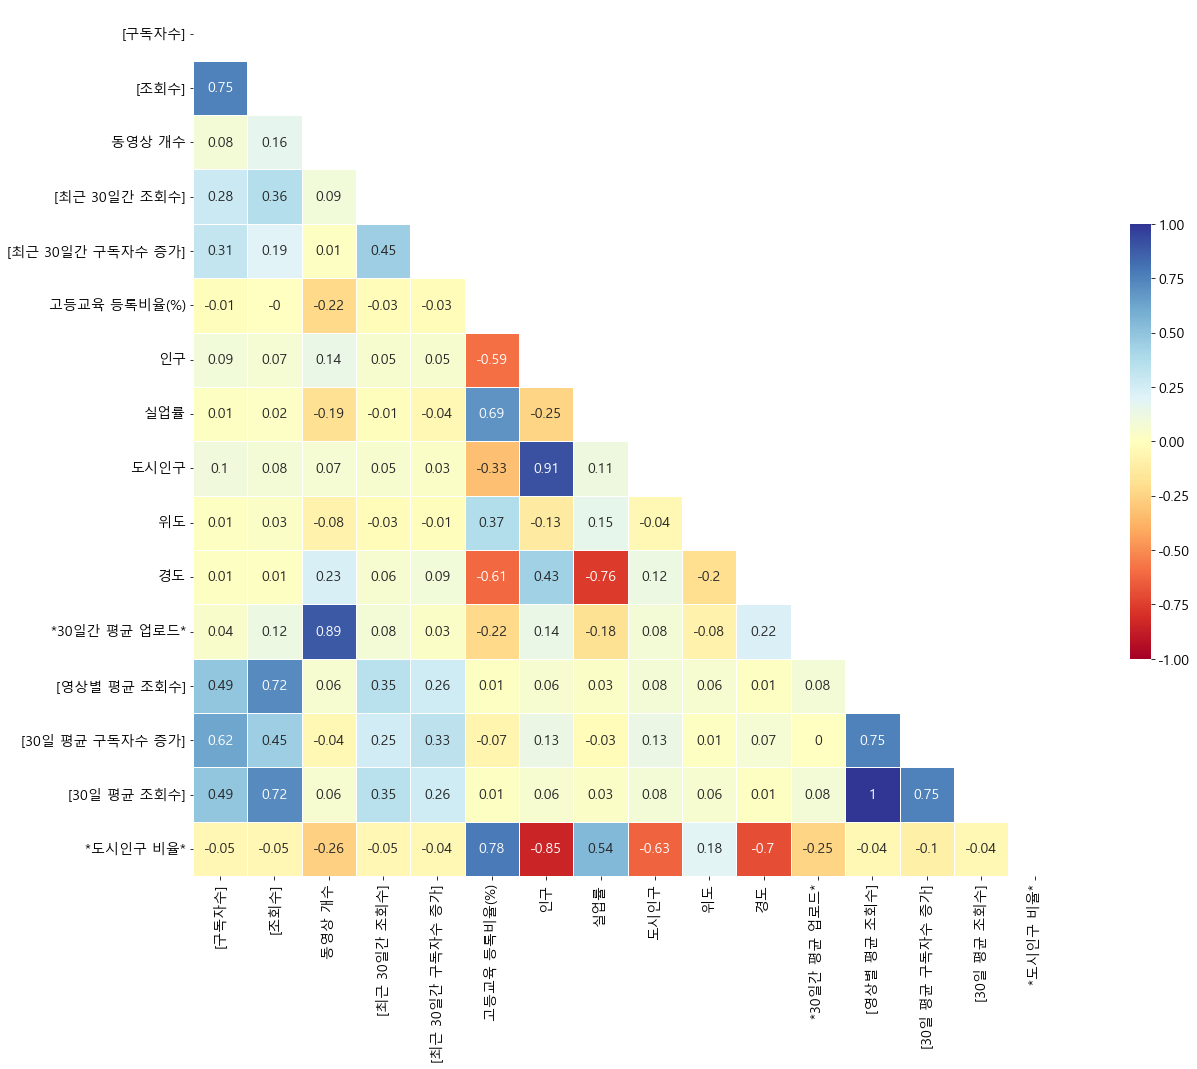

In [19]:
data['[30일 평균 구독자수 증가]'] = data['구독자수'] / data['*유지년수*'] / 12
data['[30일 평균 조회수]'] = data['조회수'] / data['*유지년수*'] / 12
data['*도시인구 비율*'] = data['도시인구'] / data['인구']

data2 = data.drop(columns=[
    '구독자 순위', '채널명', '분류', '제목', '나라', '국가코드',
    '조회수 순위', '국가별 구독자 순위', '채널 타입별 순위',
    '최소 월 수익', '최대 월 수익', '최소 연 수익', '최대 연 수익',
    '생성날짜', '*유지년수*'
])
data2 = data2.rename(columns = {
    '구독자수':'[구독자수]', '조회수':'[조회수]',
    '최근 30일간 조회수':'[최근 30일간 조회수]',
    '최근 30일간 구독자수 증가':'[최근 30일간 구독자수 증가]',
    '영상별 평균 조회수': '[영상별 평균 조회수]'
})

plt.figure(figsize=(24, 16))
triangle_heatmap(data2.corr().round(2))
plt.show()

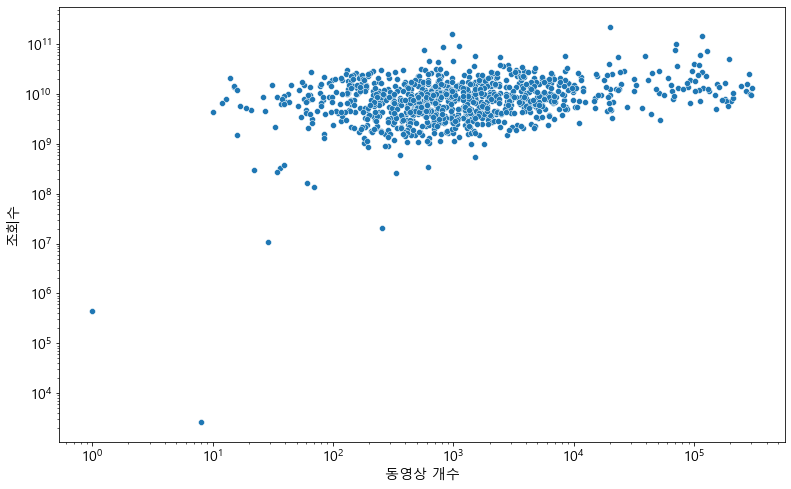

In [20]:
x = '동영상 개수'
y = '조회수'
sns.scatterplot(data, x=x, y=y)
plt.loglog()
plt.show()

- 동영상 업로드를 많이 하는 것은 총 [조회수]를 늘리는데 일부 도움이 될 수 있다.

### 범주형 데이터

In [21]:
total = data['구독자수'].sum()
data['구독자 비율(%)'] = round(data['구독자수'] / 8000000000 * 100, 1)

mask = data['동영상 개수'] > 1
columns = ['채널명', '나라', '분류', '구독자수']
influence = data.loc[mask, columns]
influence = influence.reset_index(drop=True).head(15)
influence

,채널명,나라,분류,구독자수
0,T-Series,India,Music,245000000
1,MrBeast,United States,Entertainment,166000000
2,Cocomelon - Nursery Rhymes,United States,Education,162000000
3,SET India,India,Shows,159000000
4,✿ Kids Diana Show,United States,People & Blogs,112000000
5,PewDiePie,Japan,Gaming,111000000
6,Like Nastya,United States,People & Blogs,106000000
7,Vlad and Niki,United States,Entertainment,98900000
8,Zee Music Company,India,Music,96700000
9,WWE,United States,Sports,96000000


Q. 상위권 유튜브 채널의 성공 요인에 대한 가치 있는 통찰력을 얻고 다른 채널과 차별화되는 점을 이해하십시오.

A. 
- 인기에 도움이 되는 특정 요인(수치형 데이터)이 따로 있지 않다.
       - 동영상 개수 (상관관계 0.16) 정도만 일부 영향을 미친다
- 분류 항목 기준으로 Entertainment, Music 이 1, 2위 이다.

    - 즉, 내용이 중요
    - 유튜브 채널은 재미있거나 필요한/원하는 컨텐츠이어야 한다.

- 음악은 세계 공통언어 이다.
    - [달콤한 사이언스] ‘음악은 세계공통어’ 과학적 근거 찾았다
    - https://www.seoul.co.kr/news/newsView.php?id=20191125500084
    - BLACKPINK, BANGTANTV 채널은 구독자 수가 한국의 5100만 인구를 상회한다.
       (즉, 세계적인 채널)
    
- 같은 문화(국가)권(인도), 같은 언어권(영어)의 인구가 많을 수록 유리하다.
    - SET India, Goldmines (인도 문화)
    
    - 상위권의 상당수 채널이 영어를 사용
    - PewDiePie 채널의 국가는 Japan이지만, 채널에 들어가 보면 서양인이 영어를 사용하는 채널
- 다양한 국가의 언어로 더빙을 하는 것도 인기의 주요 비결이다
    - MrBeast (한국어로도 더빙이 되어있어서 한국에서도 잘 알려짐)
    - 


## 3.지역의 인플루언서

다양한 국가의 영향력 있는 유튜브 크리에이터를 식별하고 그들이 전 세계적으로 미치는 영향을 분석합니다

In [22]:
total = data['구독자수'].sum()
data['구독자 비율(%)'] = round(data['구독자수'] / 8000000000 * 100, 1)

mask = data['동영상 개수'] > 1
columns = ['채널명', '구독자수', '구독자 비율(%)']
influence = data.loc[mask, columns]
influence = influence.reset_index(drop=True).head(15)
influence

,채널명,구독자수,구독자 비율(%)
0,T-Series,245000000,3.1
1,MrBeast,166000000,2.1
2,Cocomelon - Nursery Rhymes,162000000,2.0
3,SET India,159000000,2.0
4,✿ Kids Diana Show,112000000,1.4
5,PewDiePie,111000000,1.4
6,Like Nastya,106000000,1.3
7,Vlad and Niki,98900000,1.2
8,Zee Music Company,96700000,1.2
9,WWE,96000000,1.2


#### 세계적으로 미치는 영향
- 유튜브 채널 한 개의 영향력이 전 세계인구(80억) 기준으로 최대 3% 까지 된다.
- 우리나라 인구의 4~5배

## 카테고리별, 생성날짜별 최근 조회수(수요자 수)

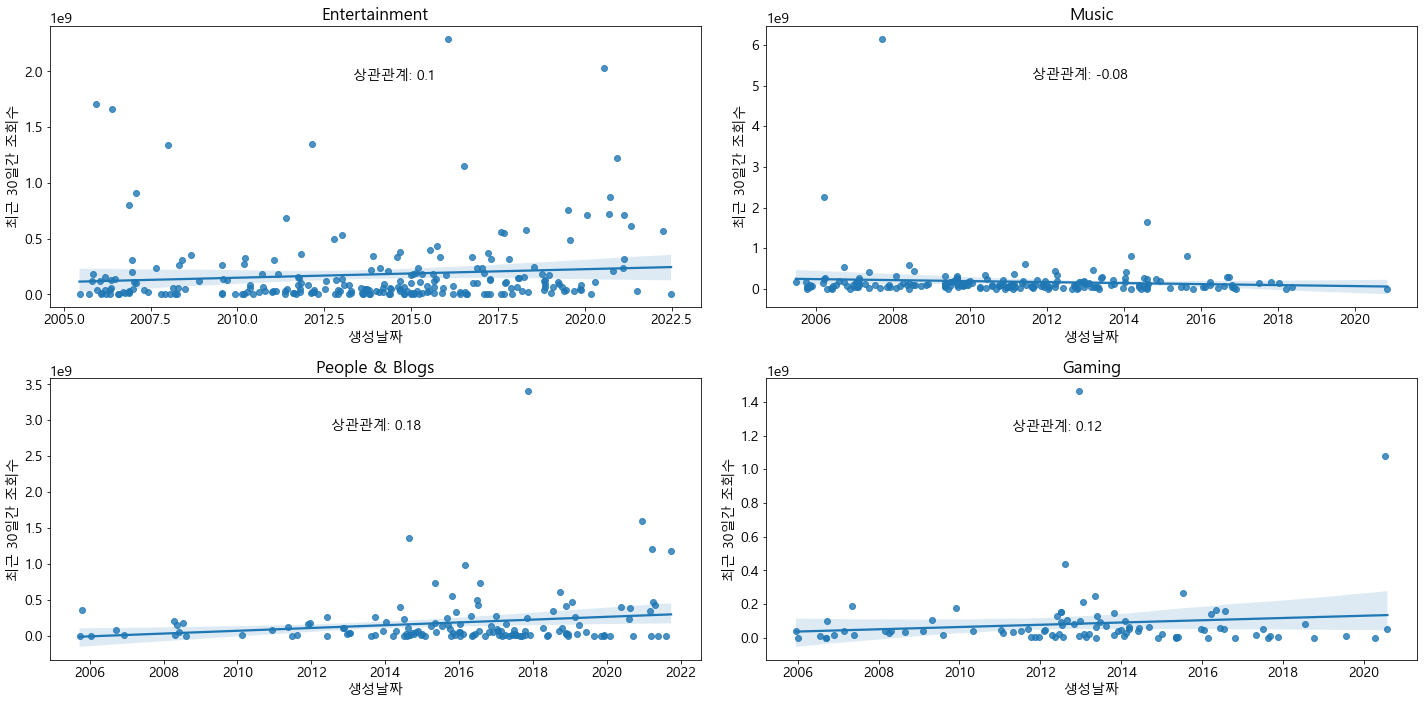

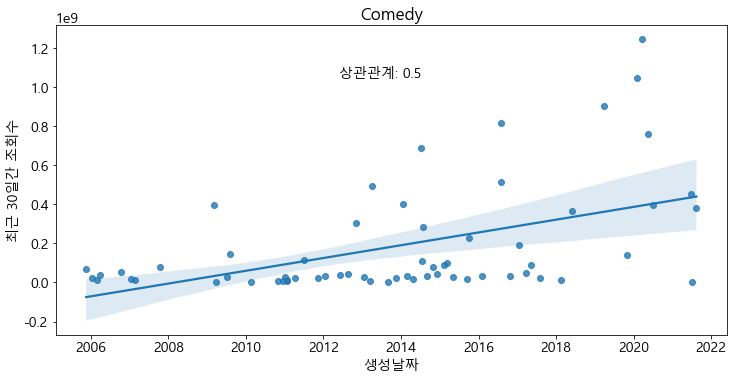

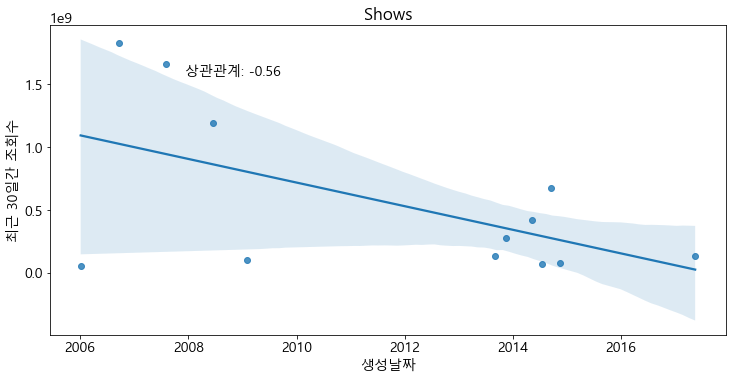

In [23]:
def regplot(x, y, cats):
    fig = plt.figure(figsize=(20, 10))
    for idx, cat in enumerate(cats):
        ax = fig.add_subplot(2, 2, idx+1)
        temp = data[data['분류']==cat]
        sns.regplot(temp, x=x, y=y, ax=ax)
        ax.text(x = (ax.get_xlim()[1] - 10), y = ax.get_ylim()[1]*.8,
                s = f'상관관계: {(temp[[x, y]].corr().iloc[0,1]).round(2)}')
        plt.title(cat)

    plt.tight_layout()
    plt.show()
    
x = '생성날짜'
y = '조회수'
y = '최근 30일간 조회수'
cats = ['Film & Animation', 'Education', 'Shows', 'Sports', 'Pets & Animals']
cats = ['Entertainment', 'Music', 'People & Blogs', 'Gaming', 'Comedy',
       'Film & Animation', 'Education', 'Howto & Style', 'News & Politics',
       'Science & Technology', 'Shows', 'Sports', 'Pets & Animals',]
regplot(x, y, cats[:4])
regplot(x, y, cats[4:5])
regplot(x, y, cats[10:11])

최근 생성 채널이 조회수가 더 높다

 --> Comedy는 트렌드의 영향을 크게 받는다

예전 생성 채널이 조회수가 더 높다

 --> Show는 오래된 채널일 수록 더 재미있다

In [24]:
import gc # garbage collector : 필요없는 메모리를 다시 가져옴.
gc.collect()

38936